In [5]:
import sys
paths = [
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/util",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/config",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/common",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/common/ds",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_intrinio",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/common/web",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_portfolio",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/test/selenium/api",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/test/selenium",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch/estypes",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch/esmappings",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch/esindexes",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch/utils",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/elasticsearch_ingestion/helper",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/elasticsearch_ingestion",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services/util",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_quandl",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_snp",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services/public",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_barchart",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_redis",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/models",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_twitter",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_edgar",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_fred",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_oecd",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_websocket",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/util/serverless/elasticsearch/helper",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/elasticsearch",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/elasticsearch/helper",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/symbol_mapping",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/sbt_elasticsearch",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_cryptocurrency",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services/user",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_cbonds",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services/screener_sbanalysis_api/"
      ]

In [6]:
sys.path += paths
sys.path.append("C:\\Users\\tbui\\Documents\\Stansberry-Terminal-MkI\\services\\screener_sbanalysis_api\\")

In [7]:
# !pip install elasticsearch-dsl

In [8]:
# !pip install psycopg2-binary

In [9]:

from pandas.io import sql as psql

In [12]:
from main.ipython_config import bulk_db

In [13]:
from lib.static_db import PgsqlExecutor

In [15]:
snpsource = {
        "host": "snp-instance-1-us-east-1b.csodrrohkuas.us-east-1.rds.amazonaws.com",
        "port": 5432,
        "user": "snpx_read",
        "credentials": "Nsp563Xz",
        "database": "xpressfeed"
      }

# research_db = {
#         "host": "dev-df-postgresql.csodrrohkuas.us-east-1.rds.amazonaws.com",
#         "port": 5432,
#         "user": "postgres",
#         "credentials": "DqR567Q1",
#         "database": "modelresearch"
#       }

research_db = {
        "host": "dev-df-postgresql.csodrrohkuas.us-east-1.rds.amazonaws.com",
        "port": 5432,
        "user": "df_user",
        "credentials": "Piq914sT",
        "database": "datafactory"
      }

In [16]:
db = PgsqlExecutor(research_db)

In [135]:
sql = """

select * from dcf_values order by symbol, fiscal_year, created
"""
data = db.get_dataframe(sql)
data.head()

id symbol  is_active  current_price  market_growth_rate  \
0  12062   AACG          1         4.6200               0.095   
1   9329   AACG          1         0.9200               0.095   
2  14788   AACG          1         0.9200               0.095   
3  14797   AACG          1         0.9200               0.095   
4   6595   AACG          1         0.8845               0.095   

   current_growth_rate  fiscal_year  market_dcf   dcf  \
0               -0.238       2017.0        11.9  48.3   
1               -7.131       2018.0        12.5   0.0   
2               -5.302       2018.0        14.8   0.0   
3               -5.302       2018.0        14.8   0.0   
4               -5.305       2019.0        18.8   0.0   

                                               error  \
0  missing tax rate: single positional indexer is...   
1  missing tax rate: single positional indexer is...   
2  missing tax rate: single positional indexer is...   
3  missing tax rate: single positional indexer is...   
4  missing tax rate: single positional indexer is...   

                     created  
0 2020-06-04 15:13:33.354444  
1 2020-06-03 21:14:50.199567  
2 2020-06-04 17:21:05.737776  
3 2020-06-04 17:21:39.041568  
4 2020-06-03 18:31:08.486712

In [136]:
def shifted_by(pd_series, row_shift):
    """
    get close price the day before shifted_by(data['close'], 1)
    :return: shifted_vals
    """
    shifted_vals = pd_series.iloc[:-row_shift]
    shifted_vals.index = pd_series.index[row_shift:]
    return shifted_vals

In [137]:
data.loc[:, 'last_symbol'] = shifted_by(data['symbol'], 1)
data.loc[:, 'last_price'] = shifted_by(data['current_price'], 1)
data.loc[:, 'last_growth_rate'] = shifted_by(data['current_growth_rate'], 1)
data.loc[:, 'last_fiscal_year'] = shifted_by(data['fiscal_year'], 1)
data.loc[:, 'last_market_dcf'] = shifted_by(data['market_dcf'], 1)
data.loc[:, 'last_dcf'] = shifted_by(data['dcf'], 1)


In [138]:
data.head()

id symbol  is_active  current_price  market_growth_rate  \
0  12062   AACG          1         4.6200               0.095   
1   9329   AACG          1         0.9200               0.095   
2  14788   AACG          1         0.9200               0.095   
3  14797   AACG          1         0.9200               0.095   
4   6595   AACG          1         0.8845               0.095   

   current_growth_rate  fiscal_year  market_dcf   dcf  \
0               -0.238       2017.0        11.9  48.3   
1               -7.131       2018.0        12.5   0.0   
2               -5.302       2018.0        14.8   0.0   
3               -5.302       2018.0        14.8   0.0   
4               -5.305       2019.0        18.8   0.0   

                                               error  \
0  missing tax rate: single positional indexer is...   
1  missing tax rate: single positional indexer is...   
2  missing tax rate: single positional indexer is...   
3  missing tax rate: single positional indexer is...   
4  missing tax rate: single positional indexer is...   

                     created last_symbol  last_price  last_growth_rate  \
0 2020-06-04 15:13:33.354444         NaN         NaN               NaN   
1 2020-06-03 21:14:50.199567        AACG        4.62            -0.238   
2 2020-06-04 17:21:05.737776        AACG        0.92            -7.131   
3 2020-06-04 17:21:39.041568        AACG        0.92            -5.302   
4 2020-06-03 18:31:08.486712        AACG        0.92            -5.302   

   last_fiscal_year  last_market_dcf  last_dcf  
0               NaN              NaN       NaN  
1            2017.0             11.9      48.3  
2            2018.0             12.5       0.0  
3            2018.0             14.8       0.0  
4            2018.0             14.8       0.0

In [145]:
def convert_direction(value):
    if value > 0:
        return 1
    return -1
data["price_change"] = data["current_price"] - data["last_price"]
data["direction"] = data["price_change"].apply(convert_direction)
data["correct"] = data["symbol"] == data["last_symbol"]
data["fiscal_change"] = data["fiscal_year"] - data["last_fiscal_year"]
data["growth_changes"] = data["current_growth_rate"] - data["last_growth_rate"]
data["market_dcf_change"] = (data["market_dcf"] - data["last_market_dcf"]) * 100 / data["last_price"]
data["dcf_change"] = (data["dcf"] - data["last_dcf"]) * 100 / data["last_price"]
data["dcf_to_price"] = (data["last_dcf"] - data["last_price"]) * 100 / data["last_price"]
data["market_dcf_to_price"] = (data["last_market_dcf"] - data["last_price"]) * 100 / data["last_price"]





In [146]:
data.head()

id symbol  is_active  current_price  market_growth_rate  \
0  12062   AACG          1         4.6200               0.095   
1   9329   AACG          1         0.9200               0.095   
2  14788   AACG          1         0.9200               0.095   
3  14797   AACG          1         0.9200               0.095   
4   6595   AACG          1         0.8845               0.095   

   current_growth_rate  fiscal_year  market_dcf   dcf  \
0               -0.238       2017.0        11.9  48.3   
1               -7.131       2018.0        12.5   0.0   
2               -5.302       2018.0        14.8   0.0   
3               -5.302       2018.0        14.8   0.0   
4               -5.305       2019.0        18.8   0.0   

                                               error  ... last_dcf  \
0  missing tax rate: single positional indexer is...  ...      NaN   
1  missing tax rate: single positional indexer is...  ...     48.3   
2  missing tax rate: single positional indexer is...  ...      0.0   
3  missing tax rate: single positional indexer is...  ...      0.0   
4  missing tax rate: single positional indexer is...  ...      0.0   

  price_change  direction  correct  fiscal_change  growth_changes  \
0          NaN         -1    False            NaN             NaN   
1      -3.7000         -1     True            1.0          -6.893   
2       0.0000         -1     True            0.0           1.829   
3       0.0000         -1     True            0.0           0.000   
4      -0.0355         -1     True            1.0          -0.003   

   market_dcf_change   dcf_change  dcf_to_price  market_dcf_to_price  
0                NaN          NaN           NaN                  NaN  
1          12.987013 -1045.454545    945.454545           157.575758  
2         250.000000     0.000000   -100.000000          1258.695652  
3           0.000000     0.000000   -100.000000          1508.695652  
4         434.782609     0.000000   -100.000000          1508.695652  

[5 rows x 26 columns]

In [147]:
new_data = data[(data["correct"])&(data["fiscal_change"] == 1) &(data["is_active"] == 1)]

In [148]:
new_data.head()

id symbol  is_active  current_price  market_growth_rate  \
1   9329   AACG          1         0.9200               0.095   
4   6595   AACG          1         0.8845               0.095   
9   9330    AAL          1        32.1100               0.095   
12  6596    AAL          1        11.2200               0.095   
17  9331   AAME          1         2.4087               0.095   

    current_growth_rate  fiscal_year  market_dcf   dcf  \
1                -7.131       2018.0        12.5   0.0   
4                -5.305       2019.0        18.8   0.0   
9              -178.284       2018.0        81.9   0.0   
12             -133.844       2019.0        92.9   0.0   
17               -0.157       2018.0         7.4 -16.7   

                                                error  ... last_dcf  \
1   missing tax rate: single positional indexer is...  ...     48.3   
4   missing tax rate: single positional indexer is...  ...      0.0   
9   missing cash_interest_paid: single positional ...  ...    193.2   
12  missing cash_interest_paid: single positional ...  ...      0.0   
17                                                     ...     17.8   

   price_change  direction  correct  fiscal_change  growth_changes  \
1       -3.7000         -1     True            1.0          -6.893   
4       -0.0355         -1     True            1.0          -0.003   
9      -19.9200         -1     True            1.0        -180.512   
12     -20.8900         -1     True            1.0          -3.005   
17      -0.9913         -1     True            1.0          -0.561   

    market_dcf_change   dcf_change  dcf_to_price  market_dcf_to_price  
1           12.987013 -1045.454545    945.454545           157.575758  
4          434.782609     0.000000   -100.000000          1508.695652  
9          -30.367096  -371.324236    271.324236            87.776283  
12          33.011523     0.000000   -100.000000           156.306447  
17         -82.352941 -1014.705882    423.529412           200.000000  

[5 rows x 26 columns]

In [149]:
new_data =new_data.loc[:, ["symbol", "current_price","last_price", "last_growth_rate","current_growth_rate", "market_dcf", "dcf", "growth_changes",
                          "market_dcf_change", "dcf_change", "last_fiscal_year", "last_market_dcf", "last_dcf", 
                           "dcf_to_price", "market_dcf_to_price","price_change", 
                           "direction"]].iloc[1:, :]

In [152]:
new_data["price_change_perf"] = (new_data["current_price"] - new_data["last_price"]) * 100 / new_data["last_price"]


In [150]:
new_data.head()

symbol  current_price  last_price  last_growth_rate  current_growth_rate  \
4    AACG         0.8845      0.9200            -5.302               -5.305   
9     AAL        32.1100     52.0300             2.228             -178.284   
12    AAL        11.2200     32.1100          -130.839             -133.844   
17   AAME         2.4087      3.4000             0.404               -0.157   
20   AAME         1.8692      2.4087             0.429                0.159   

    market_dcf   dcf  growth_changes  market_dcf_change   dcf_change  \
4         18.8   0.0          -0.003         434.782609     0.000000   
9         81.9   0.0        -180.512         -30.367096  -371.324236   
12        92.9   0.0          -3.005          33.011523     0.000000   
17         7.4 -16.7          -0.561         -82.352941 -1014.705882   
20         8.3   9.2          -0.270          12.454851  -215.884087   

    last_fiscal_year  last_market_dcf  last_dcf  dcf_to_price  \
4             2018.0             14.8       0.0   -100.000000   
9             2017.0             97.7     193.2    271.324236   
12            2018.0             82.3       0.0   -100.000000   
17            2017.0             10.2      17.8    423.529412   
20            2018.0              8.0      14.4    497.832856   

    market_dcf_to_price  price_change  direction  
4           1508.695652       -0.0355         -1  
9             87.776283      -19.9200         -1  
12           156.306447      -20.8900         -1  
17           200.000000       -0.9913         -1  
20           232.129364       -0.5395         -1

In [153]:
new_data = new_data[(new_data["price_change_perf"] < 100) & (new_data["price_change_perf"] > -100) ]

In [154]:
new_data[new_data["direction"] == 1]["dcf_to_price"].describe()

count    1.128000e+03
mean     6.511877e+09
std      2.148110e+11
min     -2.491883e+12
25%     -1.000000e+02
50%      5.892943e+00
75%      1.714663e+02
max      5.645658e+12
Name: dcf_to_price, dtype: float64

In [155]:
new_data[new_data["direction"] == 1]["market_dcf_to_price"].describe()

count    1.128000e+03
mean    -4.254399e+03
std      1.332983e+05
min     -4.204965e+06
25%     -4.381891e+00
50%      2.211446e+01
75%      9.353836e+01
max      5.094947e+05
Name: market_dcf_to_price, dtype: float64

In [156]:
new_data[new_data["direction"] == 1]["last_growth_rate"].describe()

count    1186.000000
mean        0.254938
std        13.267527
min      -134.798000
25%        -0.639000
50%         0.094000
75%         0.509750
max       228.638000
Name: last_growth_rate, dtype: float64

In [157]:
new_data[new_data["direction"] == -1]["dcf_to_price"].describe()

count    1.929000e+03
mean    -6.207909e+10
std      2.747693e+12
min     -1.206763e+14
25%     -1.000000e+02
50%     -9.988057e+01
75%      1.750000e+02
max      8.260625e+11
Name: dcf_to_price, dtype: float64

In [158]:
new_data[new_data["direction"] == -1]["market_dcf_to_price"].describe()

count      1929.000000
mean        327.934292
std       22074.993532
min     -326043.779603
25%        -119.769357
50%          23.523622
75%         145.325779
max      354527.272727
Name: market_dcf_to_price, dtype: float64

In [159]:
new_data[new_data["direction"] == -1]["last_growth_rate"].describe()

count    2063.000000
mean       -1.605766
std        28.898125
min      -578.327000
25%        -1.054000
50%         0.062000
75%         0.596000
max       190.918000
Name: last_growth_rate, dtype: float64

In [4]:
import numpy as np
import pandas as pd

In [5]:
csv_file = "./make_sense_dcf_0604.csv"
data = pd.read_csv(csv_file, header=0, index_col=0)

In [6]:
data["price_change_perf"] = (data["current_price"] - data["last_price"]) * 100 / data["last_price"]

In [7]:


features = [ "last_growth_rate",
                         "last_market_dcf", "last_dcf", 
                           "dcf_to_price", "market_dcf_to_price"]

X = data[features].values
Y = (data.loc[:, 'price_change_perf'].values) 

In [17]:
from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier, XGBRegressor

In [48]:
data.shape

(3287, 18)

In [49]:
data.head()


symbol  current_price  last_price  last_growth_rate  current_growth_rate  \
4    AACG         0.8845      0.9200            -5.302               -5.305   
9     AAL        32.1100     52.0300             2.228             -178.284   
12    AAL        11.2200     32.1100          -130.839             -133.844   
17   AAME         2.4087      3.4000             0.404               -0.157   
20   AAME         1.8692      2.4087             0.429                0.159   

    market_dcf   dcf  growth_changes  market_dcf_change   dcf_change  \
4         18.8   0.0          -0.003         434.782609     0.000000   
9         81.9   0.0        -180.512         -30.367096  -371.324236   
12        92.9   0.0          -3.005          33.011523     0.000000   
17         7.4 -16.7          -0.561         -82.352941 -1014.705882   
20         8.3   9.2          -0.270          12.454851  -215.884087   

    last_fiscal_year  last_market_dcf  last_dcf  dcf_to_price  \
4             2018.0             14.8       0.0   -100.000000   
9             2017.0             97.7     193.2    271.324236   
12            2018.0             82.3       0.0   -100.000000   
17            2017.0             10.2      17.8    423.529412   
20            2018.0              8.0      14.4    497.832856   

    market_dcf_to_price  price_change  direction  price_change_perf  
4           1508.695652       -0.0355         -1          -3.858696  
9             87.776283      -19.9200         -1         -38.285604  
12           156.306447      -20.8900         -1         -65.057614  
17           200.000000       -0.9913         -1         -29.155882  
20           232.129364       -0.5395         -1         -22.397974

In [107]:
sql = """
select symbol, current_price , current_growth_rate as last_growth_rate, 
market_dcf as last_market_dcf, dcf  as last_dcf, fiscal_year, 
(dcf - current_price) * 100 / current_price as dcf_to_price,
(market_dcf - current_price) * 100 / current_price as market_dcf_to_price

from dcf_values where is_active =1 and current_price > 5

"""
data = db.get_dataframe(sql)

In [112]:
features = [ "symbol", "fiscal_year", "current_price", "last_growth_rate",
                         "last_market_dcf", "last_dcf", 
                           "dcf_to_price", "market_dcf_to_price"]

count = 1

ret_predict_values = []

for row in data.loc[:, features].values:
    pred_values = model.predict(np.array(
        [np.array(row[3:])]
    ))
    
    if row[0] == 'TSLA':
        print(row, pred_values)
    
    if pred_values[0] > 25 and row[1] >= 2018:
        ret_predict_values.append([row[0], pred_values[0], row[1], row[2] ])
#         print(count, row[0], pred_values, row[1])
        count += 1
    
#     print (row[0], type(row), row[1:])

for row in sorted(ret_predict_values, key=lambda d:d[1], reverse=True)[0:30]:
    print (row)

['EWG', 70.17583, 2019, 104.0]
['CTXS', 50.912697, 2019, 139.15]
['ATR', 49.95335, 2019, 113.4]
['LFUS', 44.263573, 2019, 181.92]
['AOS', 43.19003, 2019, 55.0]
['BKNG', 41.645676, 2019, 1812.64]
['CASS', 41.192936, 2019, 44.45]
['ATVI', 39.48209, 2019, 61.37]
['ISRG', 38.54452, 2019, 530.8]
['IAC', 37.945896, 2019, 284.73]
['GRUB', 37.629837, 2019, 60.53]
['CAG', 37.27227, 2019, 33.42]
['JJSF', 36.967613, 2019, 139.64]
['EBS', 36.62484, 2019, 86.91]
['HUM', 36.589363, 2019, 389.86]
['INTZ', 36.183064, 2019, 5.2]
['IPHI', 36.070614, 2019, 111.72]
['CAT', 34.84945, 2019, 135.12]
['EBAY', 34.150135, 2019, 42.95]
['BR', 33.73511, 2019, 126.67]
['HSY', 33.68233, 2019, 135.44]
['CVLT', 33.193863, 2020, 39.93]
['CMD', 32.33816, 2019, 50.19]
['HEI', 32.130173, 2019, 114.34]
['CABO', 31.92916, 2019, 1741.83]
['AVY', 31.769968, 2019, 123.32]
['FT', 31.747618, 2019, 6.99]
['ARWR', 31.373869, 2019, 34.07]
['KEGX', 30.928024, 2019, 16.0]
['GRBK', 30.435469, 2019, 11.55]


In [105]:
features = [ "symbol", "fiscal_year", "current_price", "last_growth_rate",
                         "last_market_dcf", "last_dcf", 
                           "dcf_to_price", "market_dcf_to_price"]

count = 1

ret_predict_values = []

for row in data.loc[:, features].values:
    pred_values = model.predict(np.array(
        [np.array(row[3:])]
    ))
    
    if pred_values[0] < -35 and row[1] >= 2018:
        ret_predict_values.append([row[0], pred_values[0], row[1], row[2] ])
#         print(count, row[0], pred_values, row[1])
        count += 1
    
#     print (row[0], type(row), row[1:])

for row in sorted(ret_predict_values, key=lambda d:d[1], reverse=False)[0:30]:
    print (row)

['FANG', -88.838425, 2019, 52.21]
['ICPT', -86.18928, 2019, 77.92]
['AGIO', -84.97754, 2019, 50.66]
['BPMC', -84.2132, 2019, 71.17]
['BRYN', -82.70409, 2019, 177.36]
['BKH', -74.104614, 2019, 61.99]
['DUK', -70.033745, 2019, 89.49]
['ADVM', -69.971176, 2019, 22.665]
['IHC', -69.76473, 2019, 31.99]
['CHK', -67.69692, 2019, 24.8]
['ALNY', -66.52427, 2019, 127.59]
['ATEX', -66.06213, 2020, 56.13]
['HFC', -64.31639, 2019, 36.77]
['GANS', -62.832554, 2019, 28.25]
['ALE', -61.867268, 2019, 62.88]
['GATX', -60.097725, 2019, 68.77]
['CPK', -59.645916, 2019, 94.3]
['AEE', -58.81031, 2019, 75.58]
['ETR', -58.079277, 2019, 103.73]
['KIDS', -56.950478, 2019, 48.26]
['ENSG', -56.31506, 2019, 47.17]
['AEP', -55.531494, 2019, 74.57]
['HMN', -55.339405, 2019, 39.96]
['DRNA', -54.793083, 2019, 20.27]
['HZO', -54.4304, 2019, 21.67]
['AWK', -54.37466, 2019, 118.68]
['EIX', -54.07454, 2019, 60.88]
['AKRO', -53.4127, 2019, 24.05]
['LPI', -52.207104, 2019, 21.15]
['EVBG', -51.70718, 2019, 123.89]


In [ ]:
"""
['DARE', 73.863884, 2019, 1.02]
['EWG', 70.17583, 2019, 104.0]
['IPI', 55.91925, 2019, 1.3]
['DMPI', 53.28842, 2019, 1.06]
['CTXS', 50.912697, 2019, 139.15]
['ATR', 49.95335, 2019, 113.4]
['ICMB', 45.560482, 2019, 4.22]
['AOS', 43.19003, 2019, 55.0]
['HL', 43.04771, 2019, 1.64]
['BKNG', 41.645676, 2019, 1812.64]
['CASS', 41.192936, 2019, 44.45]
['ATVI', 39.48209, 2019, 61.37]
['ISRG', 38.54452, 2019, 530.8]
['IAC', 37.945896, 2019, 284.73]
['GRUB', 37.629837, 2019, 60.53]
['CAG', 37.27227, 2019, 33.42]
['JJSF', 36.967613, 2019, 139.64]
['EBS', 36.62484, 2019, 86.91]
['HUM', 36.589363, 2019, 389.86]
['INTZ', 36.183064, 2019, 5.2]
['IPHI', 36.070614, 2019, 111.72]
['INLB', 35.178093, 2019, 1.16]

['ADMA', -35.191288, 2019, 2.975]
['ATRS', -35.19761, 2019, 3.12]
['CVA', -35.3012, 2019, 5.154]
['GLYC', -35.311943, 2019, 2.95]
['CRDF', -35.357895, 2019, 3.21]
['CNK', -35.411358, 2019, 17.64]
['HEPA', -35.47125, 2019, 2.13]
['DHR', -35.66942, 2019, 21.87]
['FBM', -35.743416, 2019, 16.02]
['CIR', -35.83896, 2019, 23.06]
['GIFI', -35.852352, 2019, 3.14]
['BCOR', -35.862637, 2019, 14.73]
['CRVS', -35.963726, 2019, 3.28]
['FSLR', -36.022236, 2019, 45.7]
['BLMN', -36.151955, 2019, 13.72]
['GLXZ', -36.25586, 2019, 1.35]
['AMBC', -36.256912, 2019, 14.91]
['IRT', -36.279305, 2019, 11.62]
['FRMO', -36.322453, 2019, 5.35]
['CNO', -36.47594, 2019, 16.54]
['BGG', -37.04712, 2019, 2.34]
['GNCA', -37.118, 2019, 2.44]
['CLVS', -37.19103, 2019, 6.68]
['AEMD', -37.38423, 2019, 1.38]
['HRZN', -37.391167, 2019, 11.72]
['CHI', -37.607323, 2019, 10.8]
['CPSH', -37.62415, 2019, 1.505]
['ALK', -37.63983, 2019, 42.72]
['CLPT', -38.07108, 2019, 4.27]
['CPHC', -38.14467, 2019, 11.5166]
"""

In [95]:
features = [ "symbol", "last_fiscal_year", "last_price","current_price", "last_growth_rate",
                         "last_market_dcf", "last_dcf", 
                           "dcf_to_price", "market_dcf_to_price"]

count = 1

ret_predict_values = []

for row in data.loc[:, features].values:
    pred_values = model.predict(np.array(
        [np.array(row[4:])]
    ))
    
    if pred_values[0] < 35 and row[1] >= 2018:
        ret_predict_values.append([row[0], pred_values[0], row[1], row[2], row[3] ])
#         print(count, row[0], pred_values, row[1])
        count += 1
    
#     print (row[0], type(row), row[1:])

for row in sorted(ret_predict_values, key=lambda d:d[1], reverse=True)[0:30]:
    print (row)
    

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [ ]:
"""
['IZEA', -34.875683, 2018.0, 0.98, 0.5876]
['HSON', -34.7184, 2018.0, 13.5, 8.9]
['APWC', -34.62316, 2018.0, 1.94, 0.99]
['DLTH', -34.59014, 2018.0, 25.23, 10.53]
['NEOS', -34.54604, 2018.0, 1.65, 0.736]
['VTNR', -34.38727, 2018.0, 1.02, 0.6799]
['LPCN', -34.24518, 2018.0, 1.3, 0.8898]
['DARE', -34.187973, 2018.0, 0.7105, 1.05]
['APVO', -34.16298, 2018.0, 17.780017, 6.09]
['CERS', -34.02348, 2018.0, 5.07, 6.41]
['IMMP', -33.885292, 2018.0, 1.84, 1.19]
['RRGB', -33.87317, 2018.0, 26.72, 13.62]
['RUTH', -33.745476, 2018.0, 22.73, 8.45]
['EIGI', -33.680023, 2018.0, 6.65, 3.69]
['TTOO', -33.650932, 2018.0, 3.01, 1.07]
['AMZN', -33.554276, 2018.0, 1501.97, 2472.41]
['CBAT', -33.537766, 2018.0, 0.3799, 0.47100000000000003]
['NAOV', -33.449463, 2018.0, 3.6212, 2.37]
['KOSS', -33.426403, 2018.0, 1.9095, 1.27]
['SABR', -33.152885, 2018.0, 21.64, 7.68]
['GBLI', -33.035378, 2018.0, 36.23, 23.73]
['COMM', -32.99348, 2018.0, 16.39, 10.36]
['PFIE', -32.959145, 2018.0, 1.45, 0.8131]
['MIND', -32.899532, 2019.0, 2.87, 1.68]
['MJCO', -32.890106, 2018.0, 7.09, 8.25]
['MMYT', -32.886227, 2018.0, 24.33, 16.24]
['CXDC', -32.883427, 2018.0, 1.76, 0.9009999999999999]
['ANGO', -32.855694, 2018.0, 20.13, 10.09]
['NTWK', -32.735138, 2018.0, 6.15, 3.11]
['HRTX', -32.566936, 2018.0, 25.94, 18.46]
"""


In [18]:
# !pip3 install xgboost

In [19]:

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [20]:
# !pip3 install matplotlib

(array([ 23.,  30.,  55.,  44.,  69.,  74.,  95.,  92., 103.,  85.,  84.,
         75.,  71.,  50.,  36.,  27.,  24.,  19.,  10.,  19.]),
 array([-99.39108696, -89.47225725, -79.55342754, -69.63459783,
        -59.71576812, -49.79693841, -39.8781087 , -29.95927899,
        -20.04044928, -10.12161957,  -0.20278986,   9.71603985,
         19.63486956,  29.55369927,  39.47252898,  49.39135869,
         59.31018841,  69.22901812,  79.14784783,  89.06667754,
         98.98550725]),
 <a list of 20 Patch objects>)

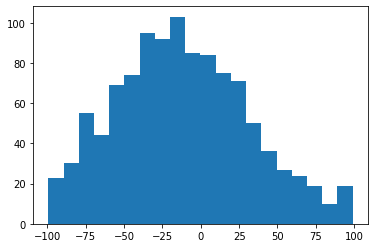

In [21]:
import matplotlib.pyplot as plt
plt.hist(y_test, bins=20)

In [22]:
filtered_outliner = data[(data["price_change_perf"] < 100) & (data["price_change_perf"] > -100) ]

In [23]:
features = [ "last_growth_rate",
                         "last_market_dcf", "last_dcf", 
                           "dcf_to_price", "market_dcf_to_price"]

X = filtered_outliner[features].values
Y = (filtered_outliner.loc[:, 'price_change_perf'].values) 
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

(array([11., 12., 14., 16., 25., 30., 20., 24., 31., 38., 27., 47., 46.,
        49., 50., 42., 53., 50., 49., 36., 45., 39., 46., 29., 38., 33.,
        26., 24., 18., 18., 16., 11., 11., 13., 10.,  9.,  7.,  3.,  8.,
        11.]),
 array([-99.39108696, -94.4316721 , -89.47225725, -84.51284239,
        -79.55342754, -74.59401268, -69.63459783, -64.67518297,
        -59.71576812, -54.75635326, -49.79693841, -44.83752355,
        -39.8781087 , -34.91869384, -29.95927899, -24.99986413,
        -20.04044928, -15.08103442, -10.12161957,  -5.16220471,
         -0.20278986,   4.756625  ,   9.71603985,  14.67545471,
         19.63486956,  24.59428442,  29.55369927,  34.51311413,
         39.47252898,  44.43194384,  49.39135869,  54.35077355,
         59.31018841,  64.26960326,  69.22901812,  74.18843297,
         79.14784783,  84.10726268,  89.06667754,  94.02609239,
         98.98550725]),
 <a list of 40 Patch objects>)

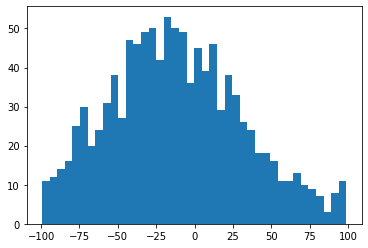

In [24]:
plt.hist(y_test, bins=40)

(array([ 30.,  43.,  43.,  51.,  69.,  78.,  70.,  75.,  89., 104., 109.,
        117., 131., 136., 142., 152., 163., 149., 155., 130., 129., 124.,
        115.,  81.,  93.,  98.,  70.,  66.,  40.,  44.,  46.,  39.,  28.,
         32.,  30.,  22.,  22.,  16.,  19.,  23.]),
 array([-9.97092511e+01, -9.47232088e+01, -8.97371665e+01, -8.47511242e+01,
        -7.97650818e+01, -7.47790395e+01, -6.97929972e+01, -6.48069549e+01,
        -5.98209126e+01, -5.48348703e+01, -4.98488280e+01, -4.48627856e+01,
        -3.98767433e+01, -3.48907010e+01, -2.99046587e+01, -2.49186164e+01,
        -1.99325741e+01, -1.49465318e+01, -9.96048944e+00, -4.97444713e+00,
         1.15951851e-02,  4.99763750e+00,  9.98367981e+00,  1.49697221e+01,
         1.99557644e+01,  2.49418068e+01,  2.99278491e+01,  3.49138914e+01,
         3.98999337e+01,  4.48859760e+01,  4.98720183e+01,  5.48580606e+01,
         5.98441030e+01,  6.48301453e+01,  6.98161876e+01,  7.48022299e+01,
         7.97882722e+01,  8.47743145e+01, 

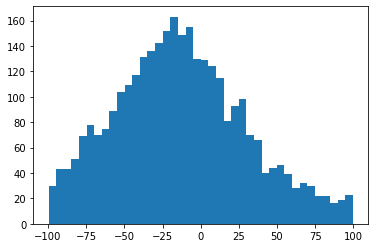

In [124]:
plt.hist(Y, bins=40)

In [25]:
# fit model no training data
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [26]:
y_pred = model.predict(X_test)

In [66]:
print(type(X_test), X_test[0])

<class 'numpy.ndarray'> [ -0.23        75.7         45.1        -36.94953167   5.8297218 ]


(array([ 1.,  1.,  2.,  2.,  2.,  1.,  4.,  5., 10., 15., 26., 25., 34.,
        45., 51., 59., 74., 90., 97., 85., 68., 92., 89., 65., 46., 31.,
        19., 14., 10.,  7.,  6.,  4.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,
         1.]),
 array([-98.76835  , -94.17664  , -89.58494  , -84.993225 , -80.40152  ,
        -75.809814 , -71.21811  , -66.6264   , -62.034695 , -57.44299  ,
        -52.85128  , -48.259575 , -43.66787  , -39.07616  , -34.484455 ,
        -29.89275  , -25.301043 , -20.709335 , -16.117628 , -11.525922 ,
         -6.9342155,  -2.3425088,   2.2491977,   6.840904 ,  11.432611 ,
         16.024319 ,  20.616024 ,  25.207731 ,  29.799438 ,  34.391144 ,
         38.98285  ,  43.57456  ,  48.166264 ,  52.757973 ,  57.349678 ,
         61.941383 ,  66.53309  ,  71.124794 ,  75.71651  ,  80.30821  ,
         84.89992  ], dtype=float32),
 <a list of 40 Patch objects>)

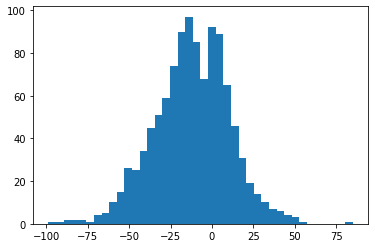

In [27]:
plt.hist(y_pred, bins=40)

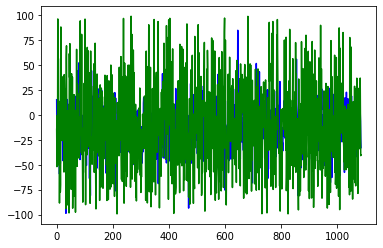

In [28]:
plt.plot(range(y_pred.shape[0]), y_pred, 'b-')
plt.plot(range(y_test.shape[0]), y_test, 'g-')
plt.show()

In [29]:
plt.plot(range(y_test.shape[0]), y_test, 'g-')
plt.plot(range(y_pred.shape[0]), y_pred, 'b-')

plt.show()

In [33]:
accuracy = accuracy_score(y_test >= 35, y_pred >= 35)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.06%


In [38]:
len([i for i in y_pred if i > 10])

162

In [39]:
len([i for i in y_test if i > 10])

330

In [113]:
accuracy = accuracy_score(y_test < -20, y_pred < -20)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 59.54%


In [46]:
len([i for i in y_pred if i < -20])

371

In [47]:
len([i for i in y_test if i < -20])

482

In [163]:
new_data.to_csv("make_sense_dcf_0604.csv")

In [162]:
!python -m nbconvert --to html DSF_Model_Review-generating-data.ipynb

[NbConvertApp] Converting notebook DSF_Model_Review-generating-data.ipynb to html
[NbConvertApp] Writing 426263 bytes to DSF_Model_Review-generating-data.html
